# Gradient Descent Derivation

We will derive the optimization algorithm from scratch

### Computing $\frac{\partial}{\partial w_0} L(w)$

\begin{align}
\frac{\partial}{\partial w_0} L(w) 
&= \frac{\partial}{\partial w_0} \frac{1}{n} \sum_{i=1}^n\left(y_i - \sin\left(w_0 x_i + w_1 \right)\right)^2 \\
&= \frac{1}{n} \sum_{i=1}^n \frac{\partial}{\partial w_0} \left(y_i - \sin\left(w_0 x_i + w_1 \right)\right)^2 \quad  \\
&= \frac{1}{n} \sum_{i=1}^n  2 \left(y_i - \sin\left(w_0 x_i + w_1 \right)\right) 
    \frac{\partial}{\partial w_0} \left(y_i - \sin\left(w_0 x_i + w_1 \right)\right) \quad\textit{# Chain Rule}\\
&= \frac{1}{n} \sum_{i=1}^n  2 \left(y_i - \sin\left(w_0 x_i + w_1 \right)\right)  
    \left(0 - \frac{\partial}{\partial w_0}\sin\left(w_0 x_i + w_1 \right)\right) \\
&= \frac{1}{n} \sum_{i=1}^n  2 \left(y_i - \sin\left(w_0 x_i + w_1 \right)\right)  
    \left(0 - \cos\left(w_0 x_i + w_1 \right) \frac{\partial}{\partial w_0}\left(w_0 x_i + w_1 \right) \right)  \quad\textit{# Chain Rule}\\
&= \frac{1}{n} \sum_{i=1}^n  2 \left(y_i - \sin\left(w_0 x_i + w_1 \right)\right)  
    \left(0 - \cos\left(w_0 x_i + w_1 \right) \left(x_i + 0 \right) \right) \\
&= -\frac{1}{n} \sum_{i=1}^n  2 \left(y_i - \sin\left(w_0 x_i + w_1 \right)\right)  
    \cos\left(w_0 x_i + w_1 \right) x_i \quad\textit{# Simplified}
\end{align}


### Computing $\frac{\partial}{\partial w_1} L(w)$

\begin{align}
\frac{\partial}{\partial w_1} L(w) 
&= \frac{\partial}{\partial w_1} \frac{1}{n} \sum_{i=1}^n\left(y_i - \sin\left(w_0 x_i + w_1 \right)\right)^2 \\
&= \frac{1}{n} \sum_{i=1}^n \frac{\partial}{\partial w_1} \left(y_i - \sin\left(w_0 x_i + w_1 \right)\right)^2 \\
&= \frac{1}{n} \sum_{i=1}^n  2 \left(y_i - \sin\left(w_0 x_i + w_1 \right)\right) 
    \frac{\partial}{\partial w_1} \left(y_i - \sin\left(w_0 x_i + w_1 \right)\right) \quad\textit{# Chain Rule}\\
&= \frac{1}{n} \sum_{i=1}^n  2 \left(y_i - \sin\left(w_0 x_i + w_1 \right)\right)  
    \left(0 - \frac{\partial}{\partial w_1}\sin\left(w_0 x_i + w_1 \right)\right) \\
&= \frac{1}{n} \sum_{i=1}^n  2 \left(y_i - \sin\left(w_0 x_i + w_1 \right)\right)  
    \left(0 - \cos\left(w_0 x_i + w_1 \right) \frac{\partial}{\partial w_1}\left(w_0 x_i + w_1 \right) \right)  \quad\textit{# Chain Rule}\\
&= \frac{1}{n} \sum_{i=1}^n  2 \left(y_i - \sin\left(w_0 x_i + w_1 \right)\right)  
    \left(0 - \cos\left(w_0 x_i + w_1 \right) \left(0 + 1\right) \right) \\
&= -\frac{1}{n} \sum_{i=1}^n  2 \left(y_i - \sin\left(w_0 x_i + w_1 \right)\right)  
    \cos\left(w_0 x_i + w_1 \right) \quad\textit{# Simplified}
\end{align}


Finally, we get
$$
L(w) = \frac{1}{n} \sum_{i=1}^n\left(y_i - \sin\left(w_0 x_i + w_1 \right)\right)^2
$$


$$
\nabla_w L(w) = \left[ \frac{\partial}{\partial w_1} L(w), \frac{\partial}{\partial w_2} L(w) \right]
$$

In [65]:
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np
import pandas as pd

In [46]:
def load_data():
  np.random.seed(42)
  n = 50
  x = np.sort(np.random.rand(n)*2.5 * np.pi)
  x = x - x.mean()/x.std()
  y = np.sin(2.2 * x + 1.8) + 0.2 * np.random.randn(n)
  return (x, y)

In [47]:
(x, y) = load_data()
print("Number of data points: ", x.shape[0])

Number of data points:  50


In [52]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='markers'))
fig.update_layout(title='Scatter')
html = plotly.offline.plot(fig, filename='3d-scatter-plotly.html',include_plotlyjs='cdn')
from IPython.core.display import HTML
HTML(html)

The data is scattered randomly and has high variance, resembling a sine function

In [53]:
def model(w, x):
  return np.sin(w[0] * x + w[1])

In [54]:
xtest = np.linspace(x.min()-0.1, x.max()+0.1, 100)

yhat1 = model([1, 1], xtest)
yhat2 = model([2, 1], xtest)
yhat3 = model([1, 2], xtest)

In [56]:
fig = px.scatter(x=x, y=y)
fig.add_trace(go.Scatter(x=xtest, y=yhat1, name="$f_{[1,1]}(x) = \sin(x+1)$"))
fig.add_trace(go.Scatter(x=xtest, y=yhat2, name="$f+{[2,1]}(x) = \sin(2x + 1)$"))
fig.add_trace(go.Scatter(x=xtest, y=yhat3, name="$f_{[1,2]}(x) = \sin(x+2)$"))
fig.update_layout(title='Scatter Sine Plot')
html = plotly.offline.plot(fig, filename='3d-scattersine-plotly.html',include_plotlyjs='cdn')
from IPython.core.display import HTML
HTML(html)

The sin function does not fit at all on the data. We need to find a parameter that is closer to the data, we need a loss function. So, we make use of average squared loss.

$$
L(w) = L\left(f_w, \mathcal{D} = \left\{(x_i, y_i \right\}_{i=1}^n\right) = \frac{1}{n} \sum_{i=1}^n\left(y_i - f_w\left(x_i\right)\right)^2
= \frac{1}{n} \sum_{i=1}^n\left(y_i - \sin\left(w_0 x_i + w_1 \right)\right)^2
$$


In [60]:
def avg_sq_loss(w):
  return np.mean((y - model(w, x))**2)
print(avg_sqloss([1,1]))

0.8519315245287105


In [62]:
fig = px.bar(x=["$w=[1,1]$", "$w=[2,1]$", "$w=[1,2]$"],
       y=[avg_sq_loss([1,1]), avg_sq_loss([2,1]), avg_sq_loss([1,2])])
fig.update_yaxes(title="Average Squared Loss")
html = plotly.offline.plot(fig, filename='3d-scatter-avgsqloss-plotly.html',include_plotlyjs='cdn')
from IPython.core.display import HTML
HTML(html)

In [66]:
loss_trials = []
w0values = np.linspace(0, 3, 30)
w1values = np.linspace(0, 3, 30)
for w0 in w0values:
    for w1 in w1values:
        loss_trials.append([w0, w1, avg_sq_loss([w0, w1])])

In [67]:
loss_df = pd.DataFrame(loss_trials, columns=["w0", "w1", "loss"])
loss_df

,w0,w1,loss
0,0.0,0.000000,0.593748
1,0.0,0.103448,0.568623
2,0.0,0.206897,0.564753
3,0.0,0.310345,0.581171
4,0.0,0.413793,0.616070
...,...,...,...
895,3.0,2.586207,0.943073
896,3.0,2.689655,0.949557
897,3.0,2.793103,0.955011
898,3.0,2.896552,0.960128


In [68]:
loss_df.sort_values("loss").head()

,w0,w1,loss
648,2.172414,1.862069,0.036495
649,2.172414,1.965517,0.041426
647,2.172414,1.758621,0.042194
676,2.275862,1.655172,0.042869
675,2.275862,1.551724,0.046697


In [69]:
# We wish to visualise the best brute force model
w_best_brute = loss_df.loc[loss_df["loss"].idxmin(), ["w0", "w1"]].to_numpy()
print(w_best_brute)

[2.17241379 1.86206897]


In [70]:
yhat_brute = model(w_best_brute, xtest)

fig = px.scatter(x=x, y=y)
fig.add_trace(go.Scatter(x=xtest, y=yhat_brute, name="Brute Force Approach"))
html = plotly.offline.plot(fig, filename='3d-scatter-avgxysqloss-plotly.html',include_plotlyjs='cdn')
from IPython.core.display import HTML
HTML(html)

We will try to get a better fit using gradient descent

In [71]:
fig = go.Figure()
fig.add_trace(go.Surface(x=w0values, y=w1values,
                         z=loss_df["loss"].to_numpy().reshape((len(w0values), len(w1values)))))
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0), height=600)
html = plotly.offline.plot(fig, filename='3d-scatter-avgxysqloss-plotly.html',include_plotlyjs='cdn')
from IPython.core.display import HTML
HTML(html)

In [72]:
fig = go.Figure()
fig.add_trace(go.Contour(x=loss_df["w0"], y=loss_df["w1"], z=loss_df["loss"]))
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0),
                  height=500, width=1000)
html = plotly.offline.plot(fig, filename='3dcontours-plotly.html',include_plotlyjs='cdn')
from IPython.core.display import HTML
HTML(html)

In [73]:
def gradient(w):
  g0 = -np.mean(2 * (y - np.sin(w[0] * x + w[1]))*np.cos(w[0]*x + w[1]*x))
  g1 = -np.mean(2 * (y - np.sin(w[0] * x + w[1]))*np.cos(w[0]*x + w[1]))
  return np.array([g0, g1])

In [74]:
gradient([1., 1.])

array([-0.68715648,  0.15427075])

In [76]:
loss_grad_df = loss_df.join(loss_df[['w0', 'w1']]
 .apply(lambda w: gradient(w), axis=1, result_type="expand")
 .rename(columns={0:"g0", 1:"g1"}))
loss_grad_df

,w0,w1,loss,g0,g1
0,0.0,0.000000,0.593748,-0.346570,-0.346570
1,0.0,0.103448,0.568623,-0.121564,-0.139293
2,0.0,0.206897,0.564753,0.095250,0.062907
3,0.0,0.310345,0.581171,0.246164,0.251583
4,0.0,0.413793,0.616070,0.301754,0.418980
...,...,...,...,...,...
895,3.0,2.586207,0.943073,-0.182591,0.069638
896,3.0,2.689655,0.949557,-0.161851,0.056666
897,3.0,2.793103,0.955011,-0.104241,0.049892
898,3.0,2.896552,0.960128,-0.025551,0.050302


In [78]:
fig = go.Figure()
fig = ff.create_quiver(x=loss_grad_df['w0'], y=loss_grad_df['w1'],
                       u=loss_grad_df['g0'], v=loss_grad_df['g1'], 
                       line_width=2, line_color="white",
                       scale = 0.1, arrow_scale=.2)
fig.add_trace(go.Contour(x=loss_grad_df['w0'], y=loss_grad_df['w1'], z=loss_grad_df['loss']))
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0), 
                  height=600, width=800)
fig.update_layout(xaxis_range=[w0values.min(), w0values.max()])
fig.update_layout(yaxis_range=[w1values.min(), w1values.max()])
html = plotly.offline.plot(fig, filename='3dplotly.html',include_plotlyjs='cdn')
from IPython.core.display import HTML
HTML(html)

In [79]:
def gradient_descent(w_0, lr = lambda t: 1./(t+1.), nepochs=10):
    w = w_0.copy()
    values = [w]
    for t in range(nepochs):
        w = w - lr(t) * gradient(w)
        values.append(w)
    return np.array(values)

In [80]:
values = gradient_descent(np.array([3.0, 0.0]), 
                          nepochs=100, 
                          lr =lambda t: 1./np.sqrt(t+1.))

In [81]:
fig = go.Figure()
fig.add_trace(go.Contour(x=loss_grad_df['w0'], y=loss_grad_df['w1'], z=loss_grad_df['loss']))
fig.add_trace(go.Scatter(x=values[:,0], y=values[:,1], name="Path", mode="markers+lines", 
                     line=go.scatter.Line(color='white')))
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0), 
                  height=600, width=800)
fig.update_layout(xaxis_range=[w0values.min(), w0values.max()])
fig.update_layout(yaxis_range=[w1values.min(), w1values.max()])
html = plotly.offline.plot(fig, filename='3dplotly.html',include_plotlyjs='cdn')
from IPython.core.display import HTML
HTML(html)

In [83]:
fig = go.Figure()
fig.add_trace(
    go.Surface(x=w0values, y=w1values, 
               z=loss_df["loss"].to_numpy().reshape((len(w0values), len(w1values)))))
fig.add_trace(
    go.Scatter3d(x=values[:,1], y=values[:,0], z=[avg_sq_loss(w) for w in values],
                line=dict(color='white')))
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0), 
                  height=600)
html = plotly.offline.plot(fig, filename='3dplotly.html',include_plotlyjs='cdn')
from IPython.core.display import HTML
HTML(html)

In [4]:
import noise
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import axes3d

In [5]:
shape = (50, 50)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

In [6]:
world = np.zeros(shape)
for i in range(shape[0]):
  for j in range(shape[1]):
    world[i][j] = noise.pnoise2(i/scale,
                                j/scale,
                                octaves=octaves,
                                persistence=persistence,
                                lacunarity=lacunarity,
                                repeatx=1024,
                                repeaty=1024,
                                base=42)

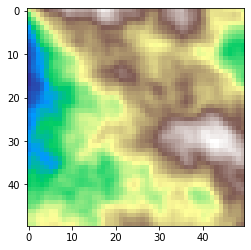

In [7]:
import matplotlib.pyplot as plt

plt.imshow(world, cmap='terrain')

In [8]:
lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)
x, y = np.meshgrid(lin_x, lin_y)

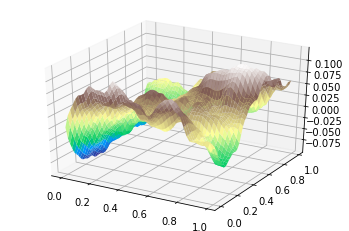

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, world, cmap="terrain")

In [12]:
terrain_cmap = matplotlib.cm.get_cmap('terrain')
def plt_to_plotly(cmap, pl_entries):
  h = 1.0/(pl_entries - 1)
  pl_colorscale = []

  for k in range(pl_entries):
    C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
    pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
  return pl_colorscale
terrain = plt_to_plotly(terrain_cmap, 255)

In [13]:
import plotly
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)

fig = go.Figure(data=[go.Surface(colorscale=terrain,z=world)])

fig.update_layout(title='Random 3D Terrain')
html = plotly.offline.plot(fig, filename='3d-terrain-plotly.html',include_plotlyjs='cdn')

In [30]:
from IPython.core.display import HTML
HTML(html)

Let us visualise the 3D Terrains, a simple optimization of gradient descent

In [17]:
from IPython.core.display import HTML
import plotly
import plotly.graph_objects as go
import noise
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

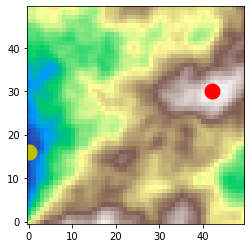

In [18]:
z = world
plt.imshow(z, origin='lower', cmap='terrain')

# Find maximum value index in numpy array
indices = np.where(z == z.max())
max_z_x_location, max_z_y_location = (indices[1][0], indices[0][0])
plt.plot(max_z_x_location, max_z_y_location, 'ro', markersize=15)

# Find minimum value index in numpy array
indices = np.where(z == z.min())
min_z_x_location, min_z_y_location = (indices[1][0], indices[0][0])
plt.plot(min_z_x_location, min_z_y_location, 'yo', markersize=15)

In [19]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

In [20]:
def sliding_window(arr, window_size):
  """
  Slide Window view of array
  """
  arr = np.asarray(arr)
  window_size = int(window_size)
  if arr.ndim!=2:
    raise ValueError("Need 2D input")
  if not(window_size>0):
    raise ValueError("Need positive window size")
  shape = (arr.shape[0] - window_size + 1,
           arr.shape[1] - window_size + 1,
           window_size, window_size)
  if shape[0] <= 0:
    shape = (1, shape[1], arr.shape[0], shape[3])
  if shape[1] <= 0:
    shape = (shape[0], 1, shape[2], arr.shape[1])
  strides = (arr.shape[1]*arr.itemsize, arr.itemsize,
             arr.shape[1]*arr.itemsize, arr.itemsize)
  return as_strided(arr, shape=shape, strides=strides)

def cell_neighbours(arr, i, j, d):
    """Return d-th neighbors of cell (i, j)"""
    w = sliding_window(arr, 2*d+1)

    ix = np.clip(i - d, 0, w.shape[0]-1)
    jx = np.clip(j - d, 0, w.shape[1]-1)

    i0 = max(0, i - d - ix)
    j0 = max(0, j - d - jx)
    i1 = w.shape[2] - max(0, d - i + ix)
    j1 = w.shape[3] - max(0, d - j + jx)

    return w[ix, jx][i0:i1,j0:j1].ravel()

In [22]:
from dataclasses import dataclass

@dataclass
class descent_step:
  value: float
  x_index: float
  y_index: float

def gradient_descent_3D(array, x_start, y_start, steps=50, step_size=1, plot=False):
  step = descent_step(array[y_start][x_start], x_start, y_start)
  step_history = []
  step_history.append(step)

  # 2D Plotting of array with starting point as red marker
  if plot:
    plt.imshow(array, origin='lower', cmap='terrain')
    plt.plot(x_start, y_start, 'ro')
  current_x = x_start
  current_y = y_start

  for i in range(steps):
    prev_x = current_x
    prev_y = current_y

    neighbours = cell_neighbours(array, current_x, current_y, step_size)

    next_step = neighbours.min()
    indices = np.where(array == next_step)

    current_x, current_y = (indices[1][0], indices[0][0])
    step = descent_step(array[current_y][current_x], current_x, current_y)

    step_history.append(step)

    if plot:
      plt.plot([prev_x, current_x], [prev_y, current_y], 'k-')
      plt.plot(current_x, current_y, 'ro')

    if prev_y == current_y and prev_x == current_x:
      print(f"Converged in {i} steps")
      break
  return next_step, step_history

Target: -0.0994970053434372 @ (array([16]), array([0]))
Converged in 3 steps
Optimal step size 18
Converged in 3 steps
Steps: [descent_step(value=0.10347005724906921, x_index=38, y_index=28), descent_step(value=-0.0385688878595829, x_index=10, y_index=21), descent_step(value=-0.08205940574407578, x_index=3, y_index=17), descent_step(value=-0.0994970053434372, x_index=0, y_index=16), descent_step(value=-0.0994970053434372, x_index=0, y_index=16)]


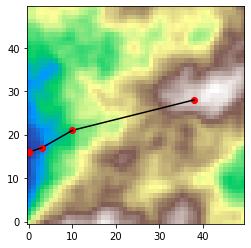

In [25]:
np.random.seed(42)
global_minimum = z.min()
indices = np.where(z == global_minimum)
print(f"Target: {global_minimum} @ {indices}")

step_size = 0
found_minimum = 99999

# Random starting point
start_x = np.random.randint(0,50)
start_y = np.random.randint(0,50)

# Increase step size until convergence on global minimum
while found_minimum != global_minimum:
    step_size += 1
    found_minimum,steps = gradient_descent_3D(z,start_x,start_y,step_size=step_size,plot=False)

print(f"Optimal step size {step_size}")
found_minimum,steps = gradient_descent_3D(z,start_x,start_y,step_size=step_size,plot=True)
print(f"Steps: {steps}")

In [26]:
def multiDimenDist(point1,point2):
   #find the difference between the two points, its really the same as below
   deltaVals = [point2[dimension]-point1[dimension] for dimension in range(len(point1))]
   runningSquared = 0
   #because the pythagarom theorm works for any dimension we can just use that
   for coOrd in deltaVals:
       runningSquared += coOrd**2
   return runningSquared**(1/2)
def findVec(point1,point2,unitSphere = False):
  #setting unitSphere to True will make the vector scaled down to a sphere with a radius one, instead of it's orginal length
  finalVector = [0 for coOrd in point1]
  for dimension, coOrd in enumerate(point1):
      #finding total difference for that co-ordinate(x,y,z...)
      deltaCoOrd = point2[dimension]-coOrd
      #adding total difference
      finalVector[dimension] = deltaCoOrd
  if unitSphere:
      totalDist = multiDimenDist(point1,point2)
      unitVector =[]
      for dimen in finalVector:
          unitVector.append( dimen/totalDist)
      return unitVector
  else:
      return finalVector

In [27]:
def generate_3d_plot(step_history):
    # Initialise empty lists for markers
    step_markers_x = []
    step_markers_y = []
    step_markers_z = []
    step_markers_u = []
    step_markers_v = []
    step_markers_w = []
    
    for index, step in enumerate(step_history):
        step_markers_x.append(step.x_index)
        step_markers_y.append(step.y_index)
        step_markers_z.append(step.value)
        
        if index < len(steps)-1:
            vec1 = [step.x_index,step.y_index,step.value]
            vec2 = [steps[index+1].x_index,steps[index+1].y_index,steps[index+1].value]

            result_vector = findVec(vec1,vec2)
            step_markers_u.append(result_vector[0])
            step_markers_v.append(result_vector[1])
            step_markers_w.append(result_vector[2])
        else:
            step_markers_u.append(0.1)
            step_markers_v.append(0.1)
            step_markers_w.append(0.1)
    
    fig = go.Figure(data=[
        go.Cone(
        x=step_markers_x,
        y=step_markers_y,
        z=step_markers_z,
        u=step_markers_u,
        v=step_markers_v,
        w=step_markers_w,
        sizemode="absolute",
        sizeref=2,
        anchor='tail'),

        go.Scatter3d(
        x=step_markers_x,
        y=step_markers_y,
        z=step_markers_z,
        mode='lines',
        line=dict(
            color='red',
            width=2
        )),

        go.Surface(colorscale=terrain,z=world,opacity=0.5)])


    fig.update_layout(
        title='Gradient Descent Steps',
        scene = dict(zaxis = dict(range=[world.min(),world.max()],),),)
    return fig
    
# Generate 3D plot from previous random starting location
fig = generate_3d_plot(steps)
HTML(plotly.offline.plot(fig, filename='random_starting_point_3d_gradient_descent.html',include_plotlyjs='cdn'))

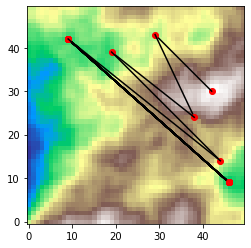

In [29]:
found_minimum,steps = gradient_descent_3D(z,max_z_x_location,max_z_y_location,step_size=5,plot=True)
fig = generate_3d_plot(steps)
HTML(plotly.offline.plot(fig, filename='maximum_starting_point_step_size_5_3d_gradient_descent.html',include_plotlyjs='cdn'))